In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
if __name__ == '__main__':
    (x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

    print("x_train.shape = ",x_train.shape)
    print("y_train.shape = ",y_train.shape)
    print("x_test.shape = ",x_test.shape)
    print("y_test.shape = ",y_test.shape)

x_train.shape =  (60000, 28, 28)
y_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28)
y_test.shape =  (10000,)


Pour afficher des images pour représenter notre dataset on écrit une fonction qui affiche 25 images alétoirement

In [3]:
def afficher_image(images,labels) :
    plt.figure(figsize=(14,14))
    for i in range(25) :
        index = np.random.randint(0, images.shape[0]-1)
        img = images[index]
        titre = labels[index]
        plt.subplot(5,5,i+1)
        plt.imshow(img,cmap='gray')
        plt.title(titre)

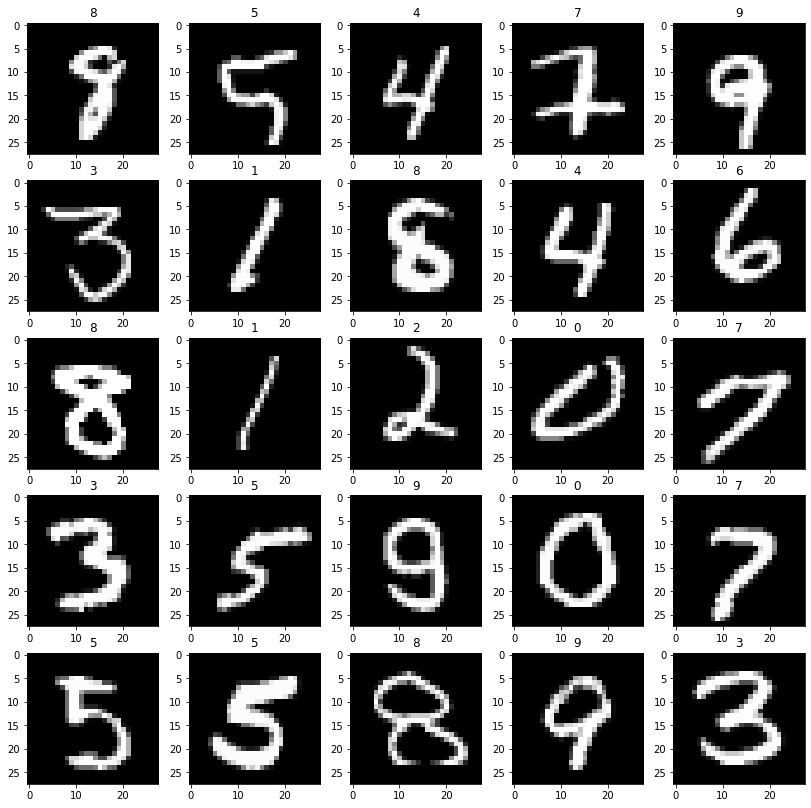

In [4]:
afficher_image(x_test,y_test)

### Construction du réseau de neurones
On importe avant tout les différents types de couches qu'on a pour faire notre projet de traitement d'images en utilisant un CNN

In [5]:
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, BatchNormalization, GlobalAvgPool2D

Pour la construction d'un réseau de neurones avec Tensorflow on a principalement 3 méthodes
- Séquentiel : C'est la plus simple pour mettre en place un réseau de neurones
- Fonctionnel : A travers une fonction qui retourne le modèle
- Classe : A travers une logique de POO, et donc une classe modèle et le reste en hérite
#### 1. Sequential way


In [26]:
model = tf.keras.Sequential(
    [
        Input(shape=(28,28,1)), # format d'entrée
        Conv2D(32, (3,3), activation='relu'), # 32 filtres de taille 3x3 avec une fonction d'activation relu
        Conv2D(64, (3,3), activation='relu'),
        MaxPool2D(),
        BatchNormalization(),
        Conv2D(128, (3,3), activation='relu'),
        MaxPool2D(),
        BatchNormalization(),

        GlobalAvgPool2D(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax') # Couche finale (softmax pour faire une classification multi classe), on choisit 10 car il y a 10 classes !!
    ]
)

#### Compiling and fitting

Pour se faire on doit commencer par une normalisation des données d'entrées (nos images)

In [6]:
# Normalisation basique
x_train = x_train.astype('float32') / 255 # Pour éviter une division entière 
x_test = x_test.astype('float32') / 255

In [7]:
# On doit ajouter une dimension à l'image qui représente la dimension de niveaux de gris car pour l'instant les images sont en deux dimensions

x_train = np.expand_dims(x_train, axis=-1) # Ajouter une dimension à la fin
x_test = np.expand_dims(x_test, axis=-1)

print("x_train.shape = ",x_train.shape)
print("y_train.shape = ",y_train.shape)
print("x_test.shape = ",x_test.shape)
print("y_test.shape = ",y_test.shape)

x_train.shape =  (60000, 28, 28, 1)
y_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28, 1)
y_test.shape =  (10000,)


In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy') # pour categorical_crossentropy on a besoin de labels codé en one hot

In [33]:
model.fit(x_train, y_train, batch_size=64, epochs=3, validation_split=0.2) # on laisse 20% des images comme validation avant de faire le test

model.evaluate(x_test,y_test, batch_size=64)

Epoch 1/3
750/750 [==============================] - 137s 181ms/step - loss: 0.2353 - accuracy: 0.9369 - val_loss: 0.1061 - val_accuracy: 0.9682
Epoch 2/3
750/750 [==============================] - 135s 180ms/step - loss: 0.0556 - accuracy: 0.9835 - val_loss: 0.1453 - val_accuracy: 0.9563
Epoch 3/3
157/157 [==============================] - 7s 46ms/step - loss: 0.0696 - accuracy: 0.9790


[0.0695856511592865, 0.9789999723434448]

Si on veut utiliser la loss function : categorical_crossentropy il faut transformer les labels en format one hot comme suit :

In [37]:
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10) # 10 c'est nombre de classes
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

In [36]:
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [39]:
model.fit(x_train, y_train_onehot, batch_size=64, epochs=3, validation_split=0.2)
model.evaluate(x_test,y_test_onehot, batch_size=64)

Epoch 1/3
750/750 [==============================] - 100s 133ms/step - loss: 0.0329 - accuracy: 0.9899 - val_loss: 0.0608 - val_accuracy: 0.9818
Epoch 2/3
750/750 [==============================] - 100s 134ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0410 - val_accuracy: 0.9877
Epoch 3/3
157/157 [==============================] - 5s 34ms/step - loss: 0.0773 - accuracy: 0.9767


[0.07733500003814697, 0.9767000079154968]

#### Functional approach 
On va recréer le même modèle avec la méthode fonctionnel 

In [40]:
def functional_model() :
    my_input = Input(shape=(28,28,1))
    x= Conv2D(32, (3,3), activation='relu')(my_input)
    x= Conv2D(64, (3,3), activation='relu')(x)
    x= MaxPool2D()(x)
    x= BatchNormalization()(x)

    x= Conv2D(128, (3,3), activation='relu')(x)
    x= MaxPool2D()(x)
    x= BatchNormalization()(x)

    x= GlobalAvgPool2D()(x)
    x= Dense(64, activation='relu')(x)
    x= Dense(10, activation='softmax')(x)

    model = tf.keras.Model(inputs=my_input, outputs=x)
    return model

In [43]:
model = functional_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(x_train, y_train, batch_size=64, epochs=3, validation_split=0.2)
model.evaluate(x_test,y_test, batch_size=64)

Epoch 1/3
750/750 [==============================] - 109s 143ms/step - loss: 0.2345 - accuracy: 0.9374 - val_loss: 0.1324 - val_accuracy: 0.9607
Epoch 2/3
750/750 [==============================] - 107s 142ms/step - loss: 0.0565 - accuracy: 0.9828 - val_loss: 0.1121 - val_accuracy: 0.9651
Epoch 3/3
157/157 [==============================] - 5s 35ms/step - loss: 0.0628 - accuracy: 0.9800


[0.06278838962316513, 0.9800000190734863]

#### Class approach
En utilisant la programmation orientée objet et les classes

In [8]:
class myModel(tf.keras.Model) :

    def __init__(self) :
        super().__init__()
        self.conv1 = Conv2D(32, (3,3), activation='relu')
        self.conv2 = Conv2D(64, (3,3), activation='relu')
        self.maxpool1 = MaxPool2D()
        self.batchnorm1 = BatchNormalization()

        self.conv3 = Conv2D(128, (3,3), activation='relu')
        self.maxpool2 = MaxPool2D()
        self.batchnorm2 = BatchNormalization()

        self.globalavgpool1 = GlobalAvgPool2D()
        self.dense1 = Dense(64, activation='relu')
        self.dense2 = Dense(10, activation='softmax')

    def call(self,my_input) :
        x= self.conv1(my_input)
        x= self.conv2(x)
        x= self.maxpool1(x)
        x= self.batchnorm1(x)

        x= self.conv3(x)
        x= self.maxpool2(x)
        x= self.batchnorm2(x)

        x= self.globalavgpool1(x)
        x= self.dense1(x)
        x= self.dense2(x)

        return x


In [9]:
model = myModel()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(x_train, y_train, batch_size=64, epochs=3, validation_split=0.2)
model.evaluate(x_test,y_test, batch_size=64)

Epoch 1/3
750/750 [==============================] - 119s 158ms/step - loss: 0.2241 - accuracy: 0.9387 - val_loss: 0.1525 - val_accuracy: 0.9550
Epoch 2/3
750/750 [==============================] - 130s 174ms/step - loss: 0.0543 - accuracy: 0.9832 - val_loss: 0.0742 - val_accuracy: 0.9768
Epoch 3/3
157/157 [==============================] - 7s 45ms/step - loss: 0.0837 - accuracy: 0.9742


[0.08369052410125732, 0.9742000102996826]

L'étape d'après est de sauvegarder le modèle pour une utilisation future.

On peut sauvegarder un modèle à n'importe quelle époque, et cela en analysant les performances après chaque époque pour tirer le meilleur modèle

#### Meilleure lecture du code

Pour une meilleur lecture et lisbilité du code il est préférable de mettre les modèles dans des fichiers différents, où on pourra ainsi les développer autant qu'on veut et puis on les appelle directement dans notre code principal pour les entrainer, les évaluer et puis les enregistrer pour après les utiliser dans une application dans un autre fichier, alors habituellement on aura plusieurs modèles et donc on aura au moins 3 fichiers : 
- Un fichier contenant les modèles (fichier python)
- Un fichier qui appelera ces modèles pour l'entraînement et l'évaluation et la sauvegarde
- Un fichier utilisant le modèle entrainé pour une application

Même principe pour le reste des parties, on peut garder la partie exploration des données et préparation du dataset dans un fichier à part (bien sûr tout cela dans le cas où on utilise des fichiers Python et pas un Notebook)